# Notebook Imports

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

# Gather Data

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
#understanding the number of features and thier type for the analysis

df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Exploration

In [4]:
#finding the number of instances in dataframe
df1.shape

(13320, 9)

### Understanding the importance of categorical data 'area_type' feature in the model

In [5]:
#finding number of unique area_types available

df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

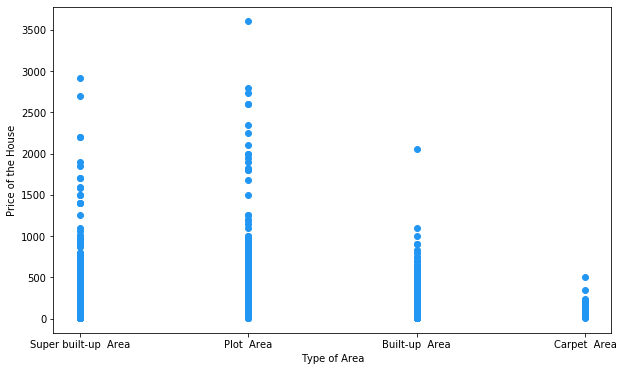

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['area_type'],df1['price'], color='#2196f3')
plt.xlabel('Type of Area')
plt.ylabel('Price of the House')
plt.show()

##### Convert the categorical values in the column 'area_type' into numerical data.
- There are 4 unique categories. So, replace them with numericals (0-4).

In [7]:
replace_area_type = {'Super built-up  Area': 0, 'Built-up  Area': 1, 'Plot  Area': 2, 'Carpet  Area': 3}
df1['area_type'] = df1.area_type.map(replace_area_type)
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,1,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,0,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,0,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df1['area_type'].corr(df1['price'])

#the correlation betweem area_type and price is 0.23 which indicates a very weak relationship.

0.23718102663464752

### Convert the categorical values in the column 'availability' into 3 categories.
- Ready to move
- Immediate Possession
- Others

In [9]:
df1.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [10]:
def replace_availabilty(my_string):
    if my_string == 'Ready To Move':
        return 0
    elif my_string == 'Immediate Possession':
        return 1
    else:
        return 2

In [11]:
df1['availability'] = df1.availability.apply(replace_availabilty)
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,2,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,0,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,1,0,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,0,0,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,0,0,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [12]:
df1['availability'].corr(df1['price'])

#the correlation betweem avilability and price is -0.03 which indicates a very weak relationship.

-0.03441582119137061

### Understanding the importance of feature 'balcony' in the model

In [13]:
#finding number of unique balcony entries available

df1.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [14]:
df1['balcony'].corr(df1['price'])

#the correlation betweem balcony and price is 0.12 which indicates a very weak relationship.

0.120355309380677

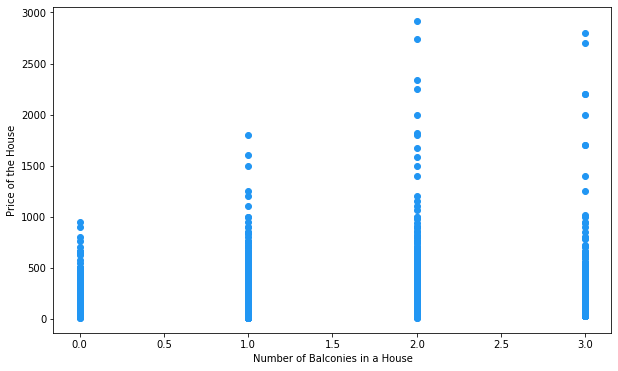

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['balcony'],df1['price'], color='#2196f3')
plt.xlabel('Number of Balconies in a House')
plt.ylabel('Price of the House')
plt.show()

## The graph below indicates that there no major correlation between number of balconies and price of the house. Hence, this features can be dropped from the model.

### Understanding the importance of feature 'society' in the model

In [16]:
df1.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [17]:
df1.society.isnull().sum()

## number of null values of society seem quite high and the feature doesnot seem to have a very high correlation with price.
##Hence removing it would be a better option for analysis.

5502

### Removing the the features 'balcony','availability','society'

In [18]:
df2 = df1.drop(['balcony','availability','society'], axis = 'columns')

In [19]:
df2.isnull().sum()

## There are only 73 null instances in bath feature and 16 null instances in size features out of 13000+ intances. 
##Hence removing them completely would be a better option.

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

#### Removing null values from df2

In [20]:
df3 = df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [21]:
df3.shape

##not much change has occured

(13246, 6)

### Preprocess the column 'size'

In [22]:
#finding number of unique values in size
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
#splitting the string into 2 parts to extract number of bedrooms in the house

df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\Akhila chowdary\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df3.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,2,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,1,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,0,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,0,Kothanur,2 BHK,1200,2.0,51.00,2


In [25]:
##exploring the type of values in bhk

df3.groupby('bhk')['bhk'].agg('count').sort_values(ascending = False)

bhk
2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
12       1
13       1
14       1
16       1
18       1
19       1
43       1
Name: bhk, dtype: int64

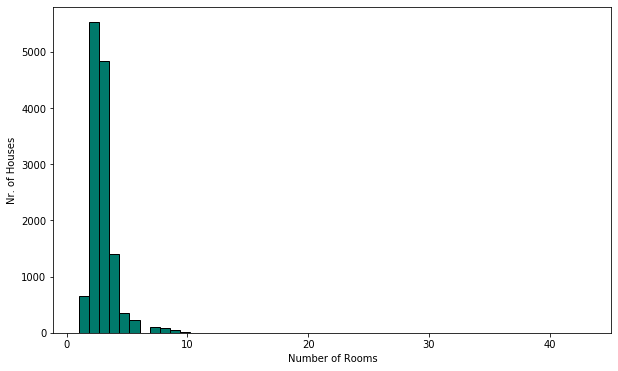

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df3['bhk'], ec='black', bins = 50, color='#00796b')
plt.xlabel('Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [27]:
##from above plot, we can infer that data is mostly accumulated between 1 to 11 rooms

df3[df3.bhk>11]

,area_type,location,size,total_sqft,bath,price,bhk
1718,0,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,0,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,0,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,2,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,0,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,2,Mysore Road,12 Bedroom,2232,6.0,300.0,12
9935,0,1Hoysalanagar,13 BHK,5425,13.0,275.0,13
11559,2,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


## Preprocessing the column 'total_sqft'

In [28]:
#Creating a function to differentiate float values

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [29]:
## removing total_sqft which are not float values

df3[~df3['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price,bhk
30,0,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,0,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,0,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,0,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,0,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,0,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,0,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,1,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,0,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,1,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [30]:
##Creating a function to convert values of 'total_sqft' from sqft to num

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [31]:
##testing the function
convert_sqft_to_num(df3['total_sqft'][30])

2475.0

In [32]:
df4 = df3.copy()

In [33]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [34]:
df4['total_sqft'].isnull().sum()

46

### Creating a Dummy variable - 'price_per_sqft' - a very important variable in price prediction

In [35]:
##creating a dummy variable - price per sqft --> which is a very important factor in predicting/engineering price values

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.isnull().sum()

area_type          0
location           0
size               0
total_sqft        46
bath               0
price              0
bhk                0
price_per_sqft    46
dtype: int64

In [36]:
#removing spaces from before and after the location names using strip()
#finding the locations and thier instances

df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [37]:
##creating a list of lcoations which were repeated less than 10 times

location_stats_less_than_10 = location_stats[location_stats<=10]

In [38]:
## to reduce the complexity in the function, the locations which were repeated less than 10 times are changed to other location

df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [39]:
df5.head(10)

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,2,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,1,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,0,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,0,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,0,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,0,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,0,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,0,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,2,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [40]:
## removing the instances which has (area per room) room less than 300

df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [41]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

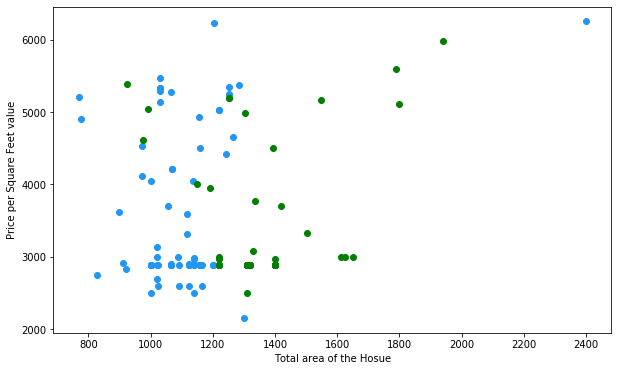

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df6.total_sqft[(df6['bhk']==2) & (df6['location'] == 'Electronic City Phase II')],
            df6.price_per_sqft[(df6['bhk']==2) & (df6['location'] == 'Electronic City Phase II')], color='#2196f3')
plt.scatter(df6.total_sqft[(df6['bhk']==3) & (df6['location'] == 'Electronic City Phase II')],
            df6.price_per_sqft[(df6['bhk']==3) & (df6['location'] == 'Electronic City Phase II')], color='green')
plt.xlabel('Total area of the Hosue')
plt.ylabel('Price per Square Feet value')
plt.show()

#### From above plot, we can observe that, few 3BHK appartments have lower price than 2BHK appartments for same sqft area & location

In [43]:
##removing the above observed outliers by normalizing the data

m = np.mean(df6.price_per_sqft)
st = np.std(df6.price_per_sqft)

df7 = df6[(df6.price_per_sqft > (m-st)) & (df6.price_per_sqft <= (m+st))]

In [44]:
df7.shape

(11294, 8)

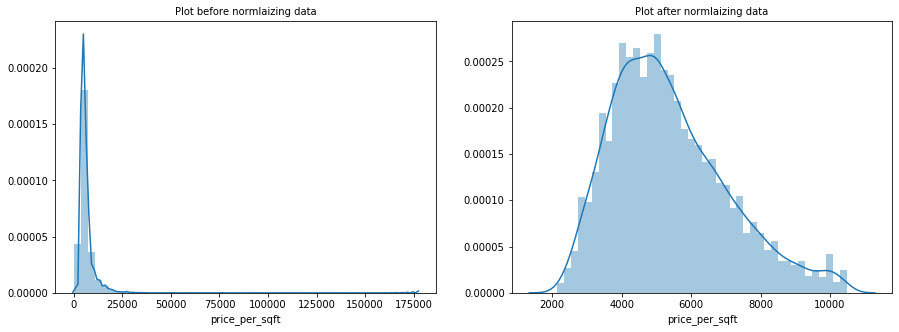

In [45]:
plt.figure(figsize=[15, 5])

#plot for data before normalization
plt.subplot(1,2,1)
plt.title('Plot before normlaizing data',fontsize=10)
sns.distplot(df6.price_per_sqft)

#plot for data after normalization
plt.subplot(1,2,2)
plt.title('Plot after normlaizing data',fontsize=10)
sns.distplot(df7.price_per_sqft)
plt.show()

### Preprocessing 'bath' column

In [46]:
##bath values should always be less than number of rooms+2
df8 = df7[df7.bath < df7.bhk+2 ]

In [47]:
df8

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,2,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,1,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,0,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,0,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,0,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,1,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13317,1,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,0,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [48]:
##dropping 'size' and dummy 'price_per_sqft' features
df9 = df8.drop( ['size','price_per_sqft'], axis = 1)

### Creating dummy variables for locations

In [49]:
dummies = pd.get_dummies(df9.location)

In [50]:
df10 = pd.concat([df9,dummies],axis = 1)

In [51]:
df11 = df10.drop(['other','location'],axis=1)

In [52]:
df11.head(2)

,area_type,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2600.0,5.0,120.00,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Multi Variable Linear Regression

In [53]:
regr = LinearRegression()

In [54]:
y = df11.price
features = df11.drop(['price'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(features,y,test_size=0.25, random_state=10)

In [55]:
regr.fit(x_train,y_train)

print('Training data r-squared:', regr.score(x_train, y_train))
print('Test data r-squared:', regr.score(x_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Training data r-squared: 0.8364844184902775
Test data r-squared: 0.8432288985311555
Intercept -15.272827364211167


,coef
area_type,5.405954
total_sqft,0.069253
bath,4.120830
bhk,-6.310445
1st Block Jayanagar,10.617263
...,...
Yelachenahalli,3.652298
Yelahanka,-3.720260
Yelahanka New Town,-2.123273
Yelenahalli,-19.121767


# Improving model

### Data Transformation using log

In [56]:
#finding the skewness of the price 
df11['price'].skew()

7.03382670053157

In [57]:
#converting the 'price' feature into log values 
y_log = np.log(df11['price'])
y_log.tail(2)

13318    6.190315
13319    2.833213
Name: price, dtype: float64

In [58]:
y_log.skew()

0.4699283558808812

### Regression using log price values

In [59]:
y = df11.price
#log_prices = np.log(df11['price']) # Use log prices
features = df11.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, y, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(x_train, y_train)

print('Training data r-squared:', regr.score(x_train, y_train))
print('Test data r-squared:', regr.score(x_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

#Training data r-squared for log-prices: 0.7171685406525697
#Test data r-squared for log-prices: 0.6712923378986955
#Intercept for log-prices: 3.2407839116070294
## the r-squared values have reduced drastically 

Training data r-squared: 0.8341931317727203
Test data r-squared: 0.8532435175094046
Intercept -14.600827459135601


,coef
area_type,5.225545
total_sqft,0.068815
bath,4.429984
bhk,-6.598605
1st Block Jayanagar,10.342135
...,...
Yelachenahalli,3.636528
Yelahanka,-3.359603
Yelahanka New Town,-2.193597
Yelenahalli,-17.187917


## p values & Evaluating Coefficients

In [60]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

df = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

df[df['p-value'] > 0.05].count()

coef       143
p-value    143
dtype: int64

## Checking mean square error of the function

In [61]:
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

##the mean square error of the prediction is 735.6

735.5870313312402

## Plotting Actual vs Predicted values

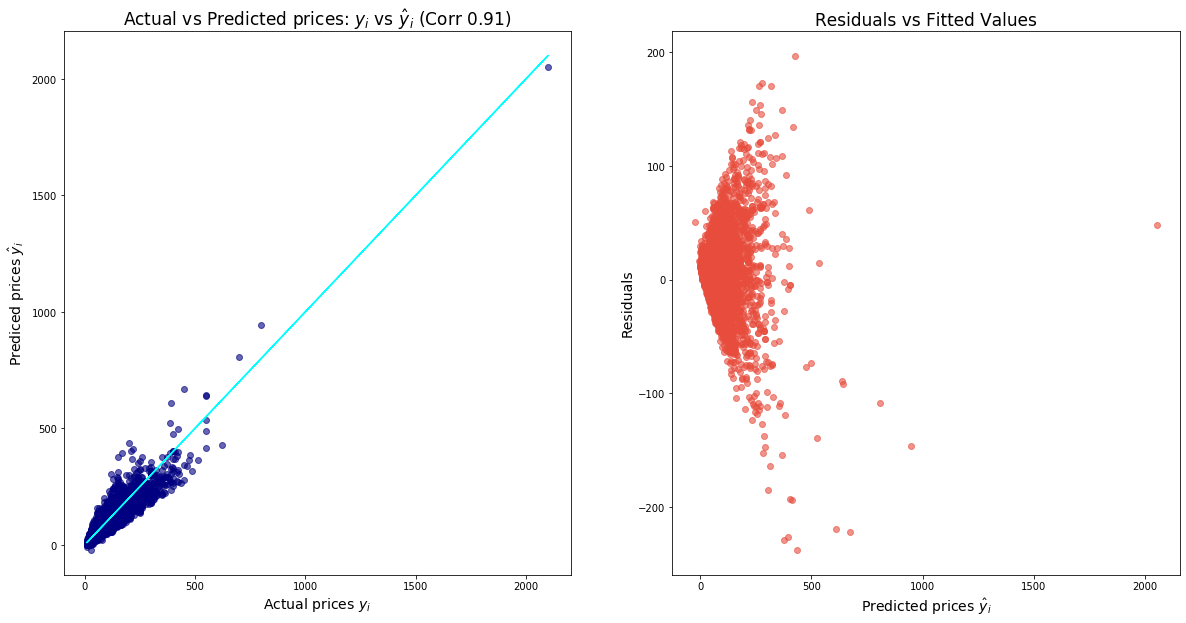

In [62]:
#Graph of Actual vs. Predicted Prices
plt.subplot(1,2,1)

corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Prediced prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

# Residuals vs Predicted values
plt.subplot(1,2,2)
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

## The correlation between actual and predicted prices is high
## The residual values are forming a cloud around 0, except for few outliers. Which means there is an important feature which was missed out in the training data set.

## Plotting residual Distribution plot

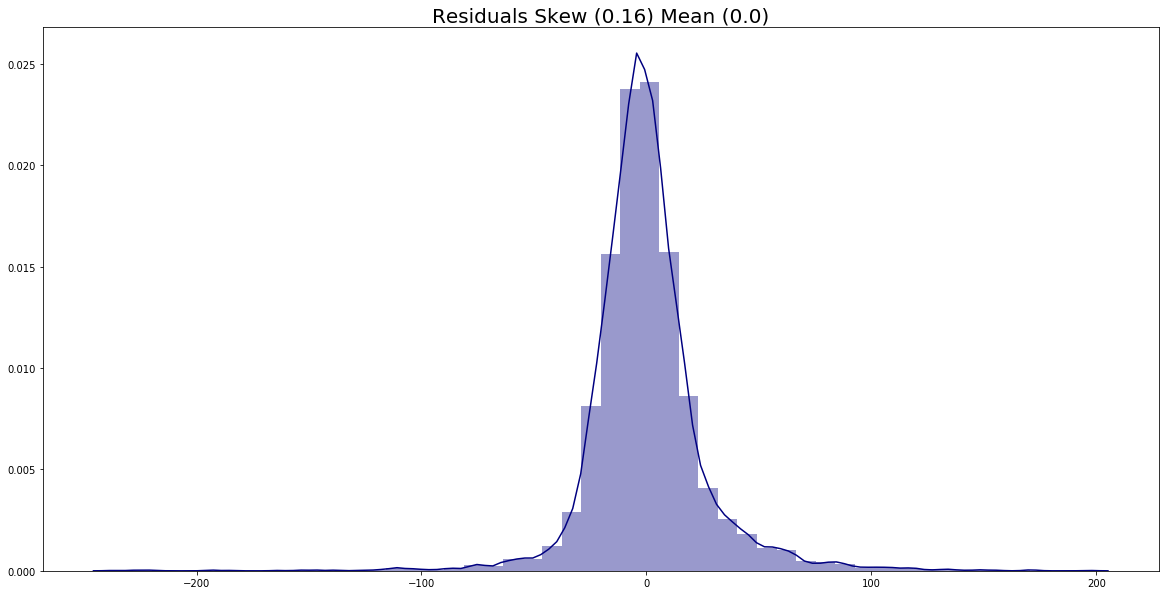

In [63]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})',fontsize=20)
plt.show()

## Skewed because of outliers

### Removing price values which are greater 500

In [64]:
df12 = df11[~(df11['price'] >500)]

In [79]:
## fitting the linear regression again, to check for improvement
y = df12.price
features = df12.drop(['price'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(features,y,test_size=0.25, random_state=10)

x_incl_const = sm.add_constant(x_train)

reduced_model = sm.OLS(y_train, x_incl_const)
reduced_results = reduced_model.fit()

reduced_mse = round(reduced_results.mse_resid, 3)
reduced_rsquared = round(reduced_results.rsquared, 3)

print(reduced_mse,reduced_rsquared)  ##Values are mse = 650.3 Rsquared = 0.805

## Even though the mse has decreased, the R-squared value has also decreased. Hence, this transformation is not improving the model

650.315 0.805


# Conclusion
##### In the above analysis, 2 major improvement methods have been applied:1)Transformation using log 2) Removing outlier prices from train data
- Upon appling these 2 improvements methods, even though there is a reduction in mean-squared-error, there was a drastric fall in R-squared value. 
- The final linear regression model has an R-squared value of 0.84, with a mean-squared-error values of 735
- Even though there a very strong correlation (0.91) between the predicted and actual price values, there are few outliers which is causing a skew (0.16) in the residual values
- Hence, we can conclude that there might have been few features like the 'view point', 'next to river', 'accessibility to IT insdustry', 'Age & Aesthitics of the building' which are missed in the original training data set.

# Valuation Tool

In [66]:
def predict_price(location,sqft,bath,bhk):
    location_index = np.where(features.columns == location)[0][0]
    
    x = np.zeros(len(features.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if location_index >=0:
        x[location_index] = 1
    
    return regr.predict([x])[0]

In [76]:
predict_price('Whitefield',1000,4,5)

5236.742419668463

In [77]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(regr,f)

In [78]:
import json
columns = {
    'data_columns' : [col.lower() for col in features.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))